In [1]:
import pandas as pd

df = pd.read_csv('Twitch_game_data.csv')

In [2]:
df

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
13395,196,Farming Simulator 19,7,2021,734652,92123 hours,8851,294,8291,988,123,7.97
13396,197,RuneScape,7,2021,727039,40883 hours,7311,112,2689,978,55,17.78
13397,198,Demon's Souls,7,2021,724001,36562 hours,110109,116,4066,974,49,19.80
13398,199,Football Manager 2021,7,2021,696341,27205 hours,4301,99,2010,937,36,25.60


In [3]:
df['Game'].nunique()

1692

In [4]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 80)
pd.set_option('display.max_colwidth', 50)

In [5]:
df['Game'].value_counts()

Dungeons & Dragons                68
Dota 2                            67
osu!                              67
Tom Clancy's Rainbow Six Siege    67
Tibia                             67
                                  ..
VVVVVV                             1
Desolate                           1
duplicate Sleepers                 1
BONEWORKS                          1
Neon Abyss                         1
Name: Game, Length: 1692, dtype: int64

In [6]:
# Top three games on Twitch for each year

#df[(df['Rank'] <= 3) & (df['Month'] == 1)]
top_games = df.groupby(['Year','Game']).sum()['Hours_watched'].sort_values(ascending=False)
top_games_list = top_games.tolist()
top_games

Year  Game                            
2020  Just Chatting                       1995891029
2021  Just Chatting                       1827518216
2020  League of Legends                   1553536532
2018  Fortnite                            1358048914
2021  Grand Theft Auto V                  1202343310
                                             ...    
2016  Goat Simulator                           95776
      Cards Against Humanity                   95184
      Hitman: Blood Money                      93954
      Savage: Resurrection                     93754
      The Mean Greens: Plastic Warfare         92460
Name: Hours_watched, Length: 3192, dtype: int64

In [7]:
top_games[top_games == 1995891029].index[0]

(2020, 'Just Chatting')

In [8]:
hours_watched_list = []
year_list = []
game_list = []
count = 0

for i in [2016, 2017, 2018, 2019, 2020, 2021]:
    for j in range(0, len(top_games_list)):
        if top_games[top_games == top_games_list[j]].index[0][0] == i:
            hours_watched_list.append(top_games_list[j])
            year_list.append(top_games[top_games == top_games_list[j]].index[0][0])
            game_list.append(top_games[top_games == top_games_list[j]].index[0][1])
            count += 1
        if count == 3:
            count = 0
            break

In [9]:
game_list

['League of Legends',
 'Counter-Strike: Global Offensive',
 'Dota 2',
 'League of Legends',
 "PLAYERUNKNOWN'S BATTLEGROUNDS",
 'Dota 2',
 'Fortnite',
 'League of Legends',
 'Dota 2',
 'League of Legends',
 'Fortnite',
 'Just Chatting',
 'Just Chatting',
 'League of Legends',
 'Fortnite',
 'Just Chatting',
 'Grand Theft Auto V',
 'League of Legends']

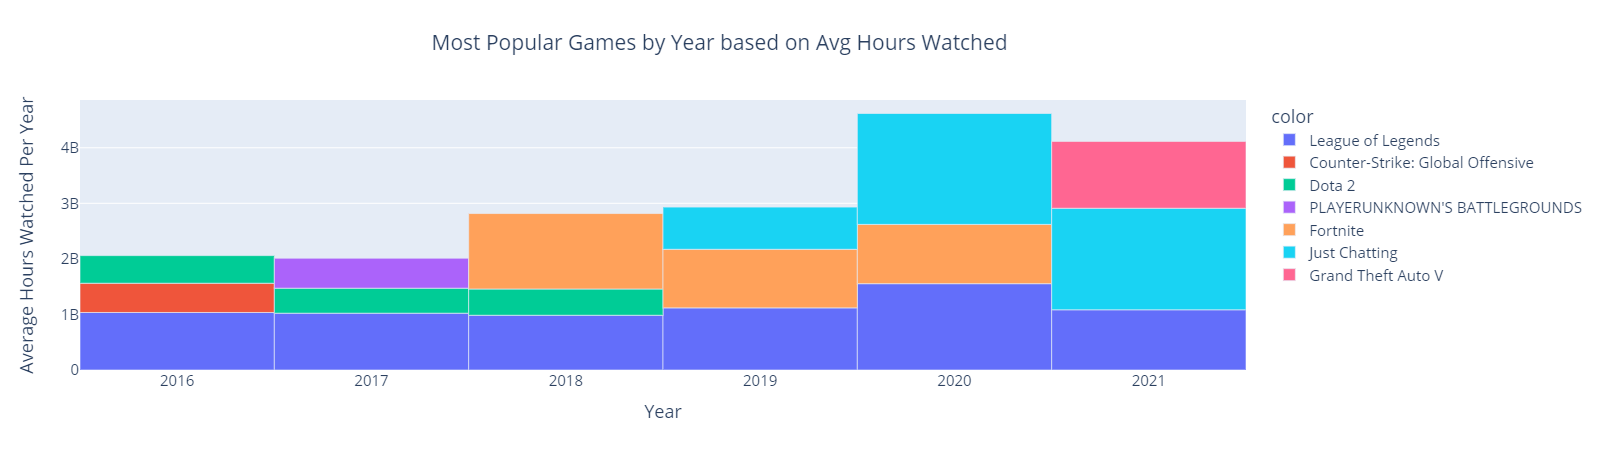

In [18]:
import plotly.express as px

fig = px.bar(x=year_list, y=hours_watched_list, color=game_list, 
             barmode='relative', width=1000, title = 'Most Popular Games by Year based on Avg Hours Watched')
fig.update_layout(autosize = False, title={'x':0.45}, font={'size':15}, yaxis_title = 'Average Hours Watched Per Year', xaxis_title = 'Year', bargap=0)   # set title coordinates
fig.show()

In [11]:
df

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
13395,196,Farming Simulator 19,7,2021,734652,92123 hours,8851,294,8291,988,123,7.97
13396,197,RuneScape,7,2021,727039,40883 hours,7311,112,2689,978,55,17.78
13397,198,Demon's Souls,7,2021,724001,36562 hours,110109,116,4066,974,49,19.80
13398,199,Football Manager 2021,7,2021,696341,27205 hours,4301,99,2010,937,36,25.60


In [12]:
df.groupby(['Year', 'Month']).sum()['Avg_viewers'].reset_index()

,Year,Month,Avg_viewers
0,2016,1,593033
1,2016,2,597543
2,2016,3,625403
3,2016,4,613548
4,2016,5,574557
...,...,...,...
62,2021,3,2662288
63,2021,4,2834516
64,2021,5,2858061
65,2021,6,2469007


In [13]:
import itertools
sums = df.groupby(['Year', 'Month']).sum().reset_index()
sums['Date'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(sums.Year, sums.Month, itertools.repeat(1))])
sums

,Year,Month,Rank,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
0,2016,1,20100,440695158,13835909,38823,1690892,593033,14948,66709.03,2016-01-01
1,2016,2,20100,415361414,4738043,40582,1662437,597543,15709,13694.39,2016-02-01
2,2016,3,20100,464749316,6131211,41194,1724196,625403,15615,16895.17,2016-03-01
3,2016,4,20100,441211782,5859357,41864,1641525,613548,15810,18017.66,2016-04-01
4,2016,5,20100,426970292,5203928,46592,1831310,574557,15477,13714.21,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...
62,2021,3,20100,1978145900,17115297,210222,6680929,2662288,92809,9863.24,2021-03-01
63,2021,4,20100,2038084346,19973256,253616,6574253,2834516,92118,10274.74,2021-04-01
64,2021,5,20100,2123620503,20730635,230731,6244818,2858061,89012,10384.71,2021-05-01
65,2021,6,20100,1775287252,17978096,197000,5546550,2469007,80143,9211.65,2021-06-01


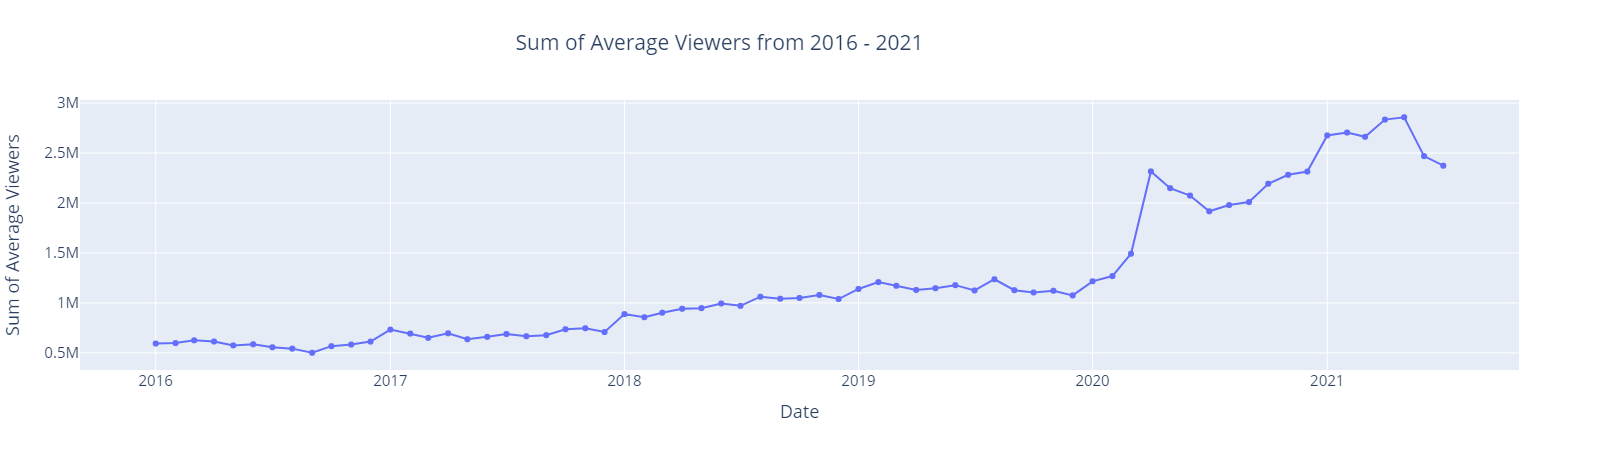

In [27]:
import plotly.express as px

fig = px.line(sums, x="Date", y="Avg_viewers", width=1000, title = 'Sum of Average Viewers from 2016 - 2021', markers=True)
fig.update_layout(autosize = False, title={'x':0.45}, font={'size':15}, yaxis_title = 'Sum of Average Viewers', xaxis_title = 'Date')   # set title coordinates
fig.show()

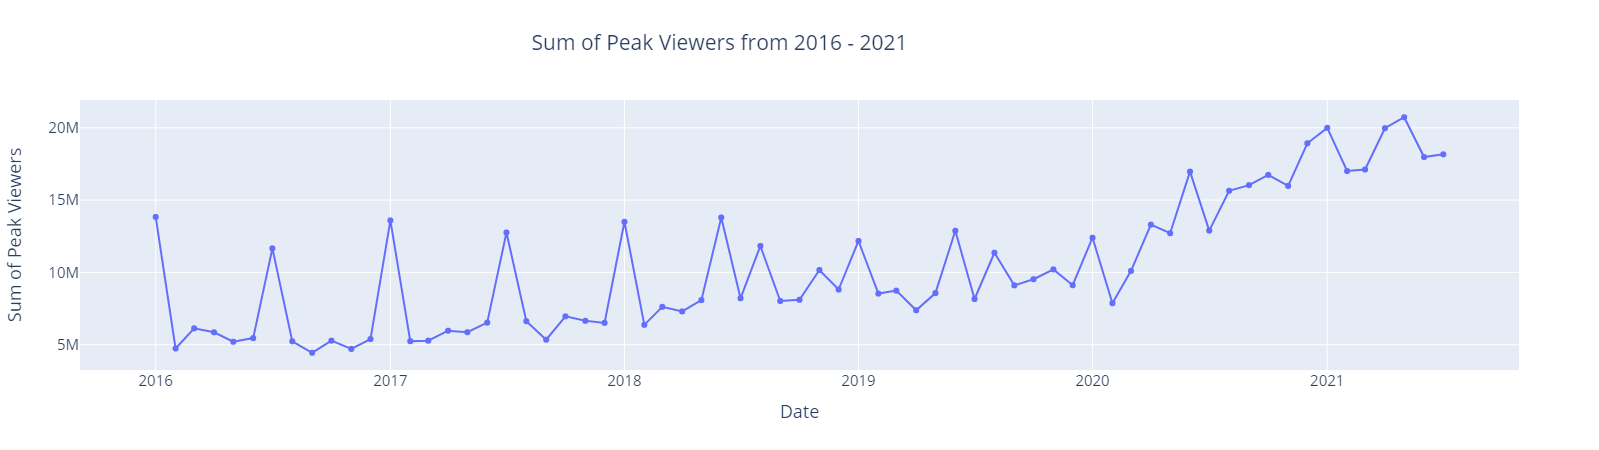

In [28]:
import plotly.express as px

fig = px.line(sums, x="Date", y="Peak_viewers", width=1000, title = 'Sum of Peak Viewers from 2016 - 2021', markers=True)
fig.update_layout(autosize = False, title={'x':0.45}, font={'size':15}, yaxis_title = 'Sum of Peak Viewers', xaxis_title = 'Date')   # set title coordinates
fig.show()